imports libaries and load data

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(r"C:\Users\nehab\Downloads\covid-19 data analysis\covid_19_data.csv")
df.head()


,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


Data cleaning

In [79]:
df['ObservationDate'] = pd.to_datetime(df['ObservationDate'])
df.fillna(0, inplace=True)
df['Active'] = df['Confirmed'] - df['Deaths'] - df['Recovered']


EDA: Descriptive statistics

In [80]:
print("Total Confirmed Cases:", df['Confirmed'].sum())
print("Total Deaths:", df['Deaths'].sum())
print("Total Recovered:", df['Recovered'].sum())


Total Confirmed Cases: 26252051758.0
Total Deaths: 624013017.0
Total Recovered: 15450237912.0


visualization


line chart-Global Growth Trends

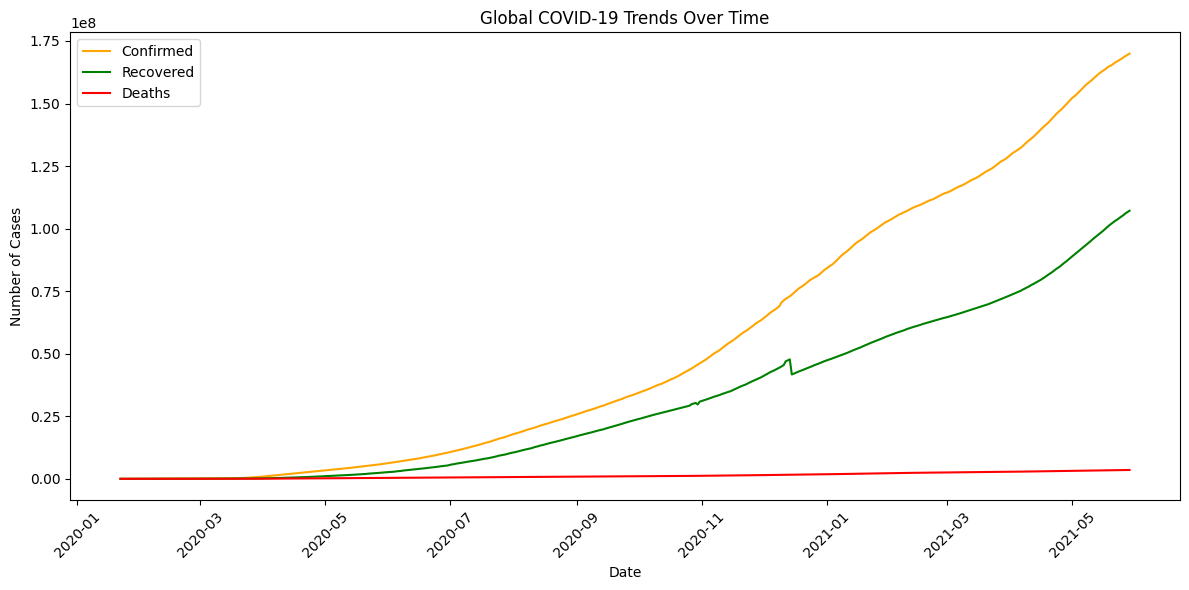

In [81]:
daily_data = df.groupby('ObservationDate')[['Confirmed', 'Deaths', 'Recovered']].sum().reset_index()

plt.figure(figsize=(12,6))
plt.plot(daily_data['ObservationDate'], daily_data['Confirmed'], label='Confirmed', color='orange')
plt.plot(daily_data['ObservationDate'], daily_data['Recovered'], label='Recovered', color='green')
plt.plot(daily_data['ObservationDate'], daily_data['Deaths'], label='Deaths', color='red')
plt.title('Global COVID-19 Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Bar plot top 10 Affected-Countries

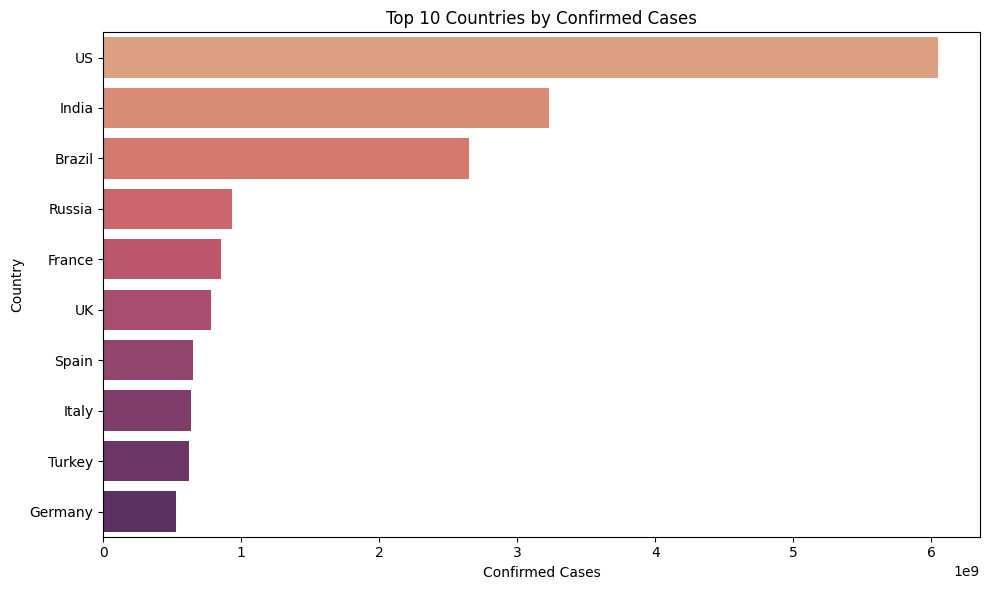

In [85]:
country_data = df.groupby('Country/Region')[['Confirmed', 'Deaths', 'Recovered']].sum().sort_values(by='Confirmed', ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=country_data['Confirmed'], y=country_data.index,hue=country_data.index ,palette='flare')
plt.title('Top 10 Countries by Confirmed Cases')
plt.xlabel('Confirmed Cases')
plt.ylabel('Country')
plt.tight_layout()
plt.show()


Pie Charts-proportions

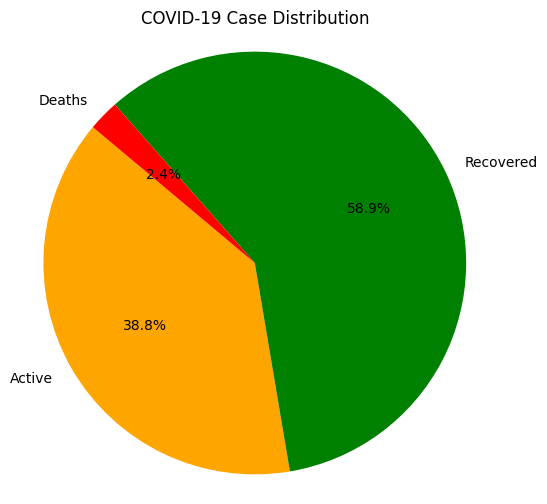

In [86]:
labels = ['Active', 'Recovered', 'Deaths']
sizes = [df['Active'].sum(), df['Recovered'].sum(), df['Deaths'].sum()]
colors = ['orange', 'green', 'red']

plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('COVID-19 Case Distribution')
plt.axis('equal')
plt.show()



     Key Insights
     
- Confirmed cases rose rapidly, especially in early and mid-2020.

- USA, India, and Brazil were the most affected countries.

- Recovery rates improved over time, crossing 90% in many regions.

- Mortality rate stayed under 5% in most cases.

- Active cases decreased with recovery and vaccination efforts.

- Missing data in Province/State was expected; all other columns were clean.




      Conclusion

- The analysis helped us understand the global impact of COVID-19, highlighting major trends in spread, recovery, and mortality. Visualization of this      data allowed us to see how the situation evolved and improved with time, and how data-driven insights can aid public health decision-making.



